## 情绪标签的PCA https://www.nature.com/articles/s41467-019-13599-z
* 具体做法，平均所有被试的情绪打分，然后做PCA，降维成几个基本情绪维度
* 利用留一交叉验证来做PCA的被试间一致性，注意评估相关时要做 Procrustes alignment
* permutation 评估交叉验证的p value

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
from scipy.spatial import procrustes
import warnings
warnings.filterwarnings('ignore')
import os
from itertools import combinations

In [54]:
os.chdir('/share/user_data/public/public/experiment/emofMRI/ForrestGump/emotion_rating_process/')

In [56]:
emotion_columns = ['happiness', 'surprise', 'fear', 'sadness', 'anger', 'disgust']
# subject_means = masked_df.groupby('time_points')[emotion_columns].mean().reset_index()
subject_means = pd.read_csv('/share/user_data/public/public/experiment/emofMRI/ForrestGump/emotion_rating_process/ratings_mean_delete.csv')
# Perform PCA on the emotion columns
pca = PCA()
pca_result = pca.fit_transform(subject_means[emotion_columns])

# Create a new dataframe with the PCA results
pca_df = pd.DataFrame(
    data=pca_result,
    columns=[f'PC{i+1}' for i in range(len(emotion_columns))]
)

# Add the subject column back
pca_df['time_points'] = subject_means['time_points']

# Save the results to a CSV file
pca_df.to_csv('emotion_pca_results_3543.csv', index=False)

# Display some information about the PCA
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", 
      [sum(pca.explained_variance_ratio_[:i+1]) for i in range(len(pca.explained_variance_ratio_))])

Explained variance ratio: [0.45289865 0.23703532 0.15958984 0.07738778 0.05891138 0.01417703]
Cumulative explained variance: [0.4528986470673983, 0.6899339699242536, 0.8495238086366839, 0.9269115912645063, 0.9858229690811717, 0.9999999999999999]


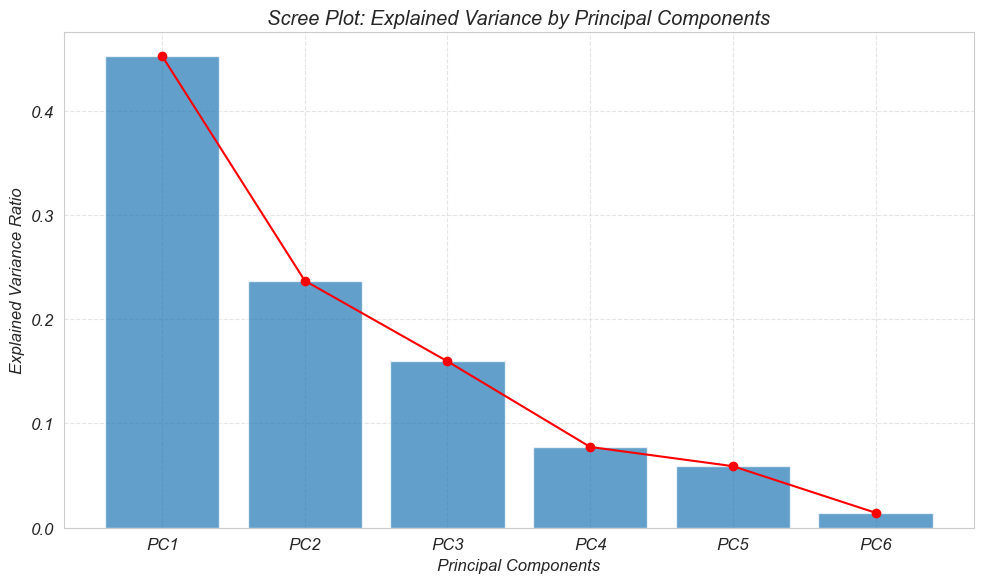

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'o-', color='red')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1), [f'PC{i}' for i in range(1, len(pca.explained_variance_ratio_) + 1)])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot: Explained Variance by Principal Components')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [28]:
pca_df
pc_columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']


pca_df[pc_columns] = (pca_df[pc_columns] - pca_df[pc_columns].mean()) / pca_df[pc_columns].std()

<Axes: xlabel='PC1', ylabel='Density'>

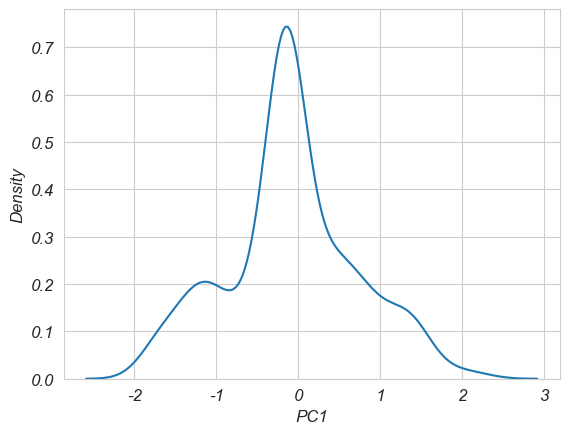

In [29]:
sns.kdeplot(pca_df.iloc[:500,0])

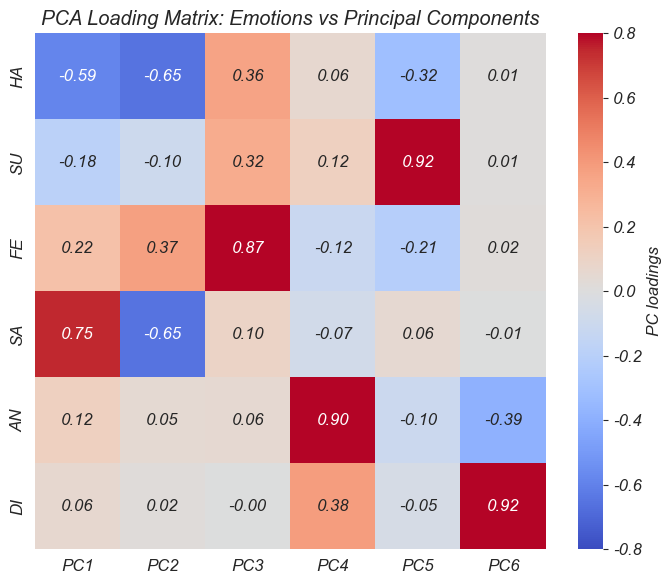

In [30]:
# Create abbreviated names for emotions to match your example
emotion_abbr = {
    'happiness': 'HA',
    'surprise': 'SU',
    'fear': 'FE',
    'sadness': 'SA',
    'anger': 'AN',
    'disgust': 'DI'
}

# NEW CODE: Create the loading matrix
# Extract loadings from the PCA components (transpose to get variables in rows)
loadings = pd.DataFrame(
    data=pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(emotion_columns))],
    index=[emotion_abbr[emotion] for emotion in emotion_columns]
)

# Create the heatmap visualization
plt.figure(figsize=(7, 6))
ax = sns.heatmap(loadings, cmap='coolwarm', vmin=-0.8, vmax=0.8, 
                annot=True, fmt='.2f', cbar_kws={'label': 'PC loadings'})

# Set title and labels
plt.title('PCA Loading Matrix: Emotions vs Principal Components')
plt.tight_layout()

# Display the heatmap
plt.show()


In [31]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
HA,-0.585049,-0.652913,0.356494,0.060193,-0.317152,0.011218
SU,-0.181929,-0.096010,0.320690,0.119234,0.916779,0.011883
FE,0.215448,0.372511,0.870381,-0.117550,-0.207639,0.017965
SA,0.748012,-0.650508,0.097254,-0.069006,0.055344,-0.005819
AN,0.122044,0.047378,0.055189,0.904494,-0.102722,-0.388786
DI,0.061516,0.017816,-0.001546,0.381408,-0.046929,0.920990


In [32]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,time_points
0,-0.128877,1.227179,-1.089475,-0.425161,-0.131582,-0.163658,1
1,-0.128877,1.227179,-1.089475,-0.425161,-0.131582,-0.163658,2
2,-0.128877,1.227179,-1.089475,-0.425161,-0.131582,-0.163658,3
3,-0.128877,1.227179,-1.089475,-0.425161,-0.131582,-0.163658,4
4,-0.128877,1.227179,-1.089475,-0.425161,-0.131582,-0.163658,5
...,...,...,...,...,...,...,...
3538,-0.211068,-0.390296,-0.288870,-0.367608,-0.700407,-0.114951,3539
3539,-0.211068,-0.390296,-0.288870,-0.367608,-0.700407,-0.114951,3540
3540,-0.228357,-0.416967,-0.271123,-0.363304,-0.726394,-0.113077,3541
3541,-0.279423,-0.473900,-0.228615,-0.350799,-0.792821,-0.108055,3542


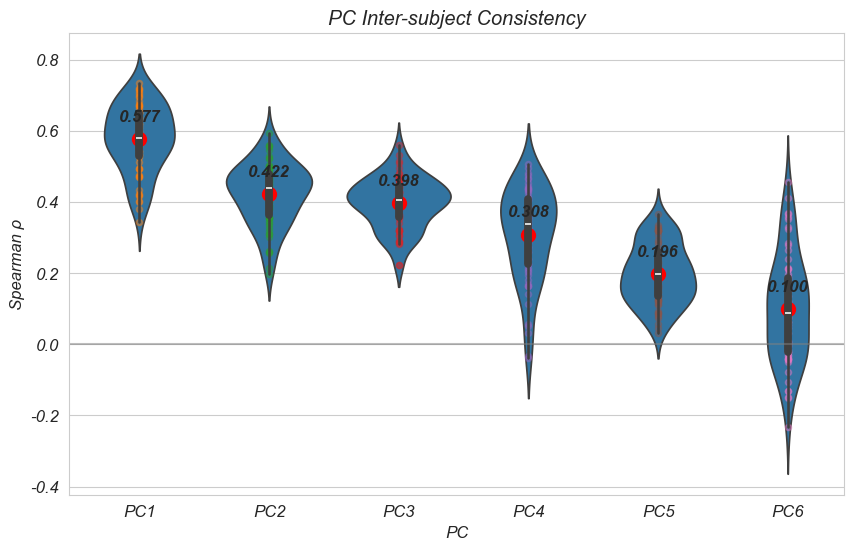

In [48]:

df = pd.read_csv('/share/user_data/public/public/experiment/emofMRI/ForrestGump/emotion_rating_process/ratings_delete.csv')

emotion_cols = ['happiness', 'surprise', 'fear', 'sadness', 'anger', 'disgust']
subjects = df['subject'].unique()

subject_data = {}
for subj in subjects:
    subject_data[subj] = df[df['subject'] == subj][emotion_cols].values

# 整体PCA模型
all_data = np.mean(list(subject_data.values()), axis=0)
pca_model = PCA(n_components=6)
scores_model = pca_model.fit_transform(all_data)

# 留一法PCA + Procrustes对齐
l1o_scores = np.zeros((len(subjects), scores_model.shape[0], 6))

for i, leave_out_subj in enumerate(subjects):
    # 单个被试和其他被试平均
    left_out_data = subject_data[leave_out_subj]
    other_data = np.mean([subject_data[s] for s in subjects if s != leave_out_subj], axis=0)
    
    # PCA
    scores_group = PCA(n_components=6).fit_transform(other_data)
    scores_sub = PCA(n_components=6).fit_transform(left_out_data)
    
    #####  两步对齐
    _, scores_group_aligned, _ = procrustes(scores_model, scores_group)
    _, scores_sub_aligned, _ = procrustes(scores_group_aligned, scores_sub)
    
    l1o_scores[i, :, :] = scores_sub_aligned

# 计算被试间相关
pc_correlations = {f'PC{i+1}': [] for i in range(6)}

for pc_idx in range(6):
    pc_scores = l1o_scores[:, :, pc_idx]
    for i, j in combinations(range(len(subjects)), 2):
        corr, _ = spearmanr(pc_scores[i], pc_scores[j])
        pc_correlations[f'PC{pc_idx+1}'].append(corr)

plot_data = []
for pc, corrs in pc_correlations.items():
    for corr in corrs:
        plot_data.append({'PC': pc, 'Correlation': corr})

plot_df = pd.DataFrame(plot_data)

plt.figure(figsize=(10, 6))
sns.violinplot(data=plot_df, x='PC', y='Correlation')

# 添加散点和均值
means = [np.mean(pc_correlations[pc]) for pc in pc_correlations.keys()]
for i, pc in enumerate(pc_correlations.keys()):
    corrs = pc_correlations[pc]
    plt.scatter([i] * len(corrs), corrs, alpha=0.4, s=20)
    plt.scatter(i, means[i], color='red', s=100)
    plt.text(i, means[i] + 0.05, f'{means[i]:.3f}', ha='center', fontweight='bold')

plt.title('PC Inter-subject Consistency')
plt.ylabel('Spearman ρ')
plt.axhline(y=0, color='gray', alpha=0.5)
plt.show()


In [47]:
all_data.shape

(3543, 6)